In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

#%matplotlib inline

In [2]:
X = np.array([-1.000, -.600, -.467, -.200, -.067])
Y = np.array([  .038,  .100,  .155,  .500,  .900])

## Ejercicio 1
 Escriba una función en Python que toma arreglos $X$ e $Y$ de los valores dados, y un valor $x$ obtiene el valor interpolado correspondiente $y = f(x)$.

In [3]:
def interpolar(x, X, Y):
    # Para cada j en [0,n]
    # D = X[j] - X[X != X[j]] son las diferencias (xj - xk) para toda k  en [0,n] y k != j
    # w = np.prod(D) es la multiplicatoria de las diferencias
    # luego tomamos su inversa W = w^-1
    w = [np.prod(X[j] - X[X != X[j]]) for j in range(len(X))]
    W = np.power(np.array(w), -1)
    
    # diff = x - X es la diferencia x - xj para cada j en [0, n]
    diff = x - X
    
    # Numerador
    # W*Y/diff es calcular (wj * f(xj))/(x - xj) para cada j en [0, n]
    # Luego realizamos la sumatoria entre estos valores
    num = np.sum(W*Y / diff)
    
    # Denominador
    # De la misma forma calculamos para el denominador W/diff 
    # equivalente a wj/(x - xj) para cada j en [0, n]
    # y sumamos los valores
    den = np.sum(W / diff)
    
    # finalmente retornamos la division
    return num/den


In [24]:
%timeit lY = Eval(coef(X, Y), X, -0.3)

The slowest run took 23.58 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 13.7 µs per loop


In [25]:
%timeit mY = F(-0.3, X, Y) 

10000 loops, best of 3: 47 µs per loop


In [26]:
%timeit nY = f(nX)

The slowest run took 5.13 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 31.5 µs per loop


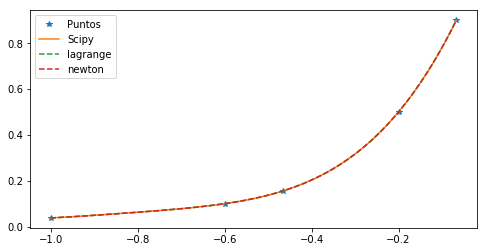

In [23]:
f = interpolate.BarycentricInterpolator(X, Y)
F = interpolar

nX = np.linspace(-1.001,-0.06701,num=100)
nY = f(nX)

mY = np.array([F(x, X, Y) for x in nX if x not in X]) 
lY = np.array([Eval(coef(X, Y), X, x) for x in nX if x not in X])
plt.figure(figsize=(8, 4))
plt.plot(X,Y, "*", nX,nY, "-", nX, mY, "--", nX, lY, "--")
plt.legend(["Puntos", "Scipy", "lagrange", "newton"])
plt.show()

In [9]:
def coef(x, y):
    '''x : array of data points
       y : array of f(x)  '''
    n = len(x)
    a = list(y)

    for j in range(1, n):

        for i in range(n-1, j-1, -1):
            a[i] = (a[i]-a[i-1])/(x[i]-x[i-j])

    return np.array(a) # return an array of coefficient

def Eval(a, x, r):
    n = len( a ) - 1
    temp = a[n]
    for i in range( n - 1, -1, -1 ):
        temp = temp * ( r - x[i] ) + a[i]
    return temp # return the y_value interpolation



array([ 0.038     ,  0.155     ,  0.4850541 ,  2.13931049,  1.91378641])

## Ejercicio 2

Escriba una función Python que implementa el método de la secante, dada lafunción f, puntos iniciales $x_0$ y $x_1$ y una tolerancia

In [2]:
def secMethod(f, x0, x1, epsilon):
    x2 = x1
    iterations = 0
    while abs(f(x2)) > epsilon and iterations < 1E6:
        # Metodo de la secante
        f0 = f(x0)
        f1 = f(x1)
        x2 = x1 - (f1*(x1 - x0))/(f1 - f0)
        
        # Contamos las iteraciones para no entrar en un bucle infinito
        iterations += 1
        
        # Actualizamos los valores
        x0, x1 = x1, x2
    return x2

In [6]:
xs = secMethod(lambda x: x**3 + 2, 0, 3, 1E-10)
xs**3 + 2

-1.687538997430238e-14

## Ejercicio 3
Use las anteriores para aproximar $f^{-1}(0.3)$

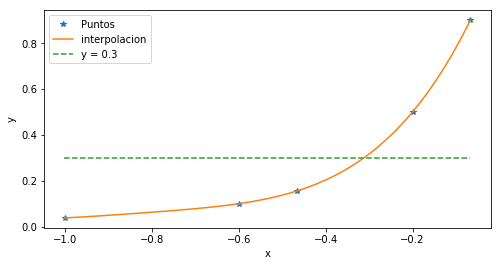

In [10]:
f = interpolate.BarycentricInterpolator(X, Y)

nX = np.linspace(-1.001,-0.06701,num=100)
nY = f(nX)

mY = np.ones(nX.shape) * 0.3

plt.figure(figsize=(8, 4))
plt.plot(X,Y, "*", nX,nY, "-", nX, mY, "--")
plt.legend(["Puntos", "interpolacion", "y = 0.3"])
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('intercepcion.png', bbox_inches='tight')
plt.show()

In [9]:
g = lambda x:  interpolar(x, X, Y) - 0.3
#g = lambda x: f(x) - 0.3
secMethod(g, -0.468, -0.19, 1E-10)

-0.31190496815431701

## Ejercicio 4
Otra forma de hacerlo es considerar $x$ una función de $y$, usando interpolación inversa. Use sus funciones con esta idea para aproximar $f^{-1}(0.3)$

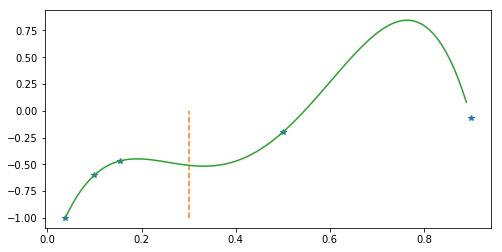

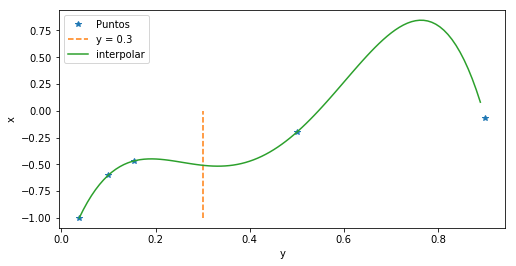

In [9]:
invf_baricentric = interpolate.BarycentricInterpolator(Y, X)
invf_interp1d = interpolate.interp1d(Y, X)
invf = interpolar

#Interpolarcion
nY = np.linspace(0.0381,0.89,num=100)
# Interpolation 1d
nX = np.array([invf_interp1d(y) for y in nY if y not in Y]) 
# Interpolation baricentric
lX = np.array([invf_baricentric(y) for y in nY if y not in Y]) 
# Interpolation 
pX = np.array([invf(y, Y, X) for y in nY if y not in Y]) 
#pX = np.array([Eval(coef(Y, X), Y, y) for y in nY if y not in Y]) 


#Vertical Line
mX = np.linspace(-1,0,num=100)
mY = np.ones(mX.shape) * 0.3


plt.figure(figsize=(8, 4))
#plt.plot(Y,X, "*",mY, mX, "--",nY, nX, "-", nY, lX, nY, pX)
plt.plot(Y,X, "*",mY, mX, "--", nY, pX)
#plt.legend(["Puntos", "y = 0.3", "interp1d", "BarycentricInterpolator", "interpolar"])
plt.xlabel("y")
plt.ylabel("x")
plt.legend(["Puntos", "y = 0.3", "interpolar"])
plt.savefig('interpolacioninversa.png', bbox_inches='tight')
plt.show()

In [12]:
invf(0.3, Y,X)

-0.50864947547118655